In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import poisson
from math import exp, factorial
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import weibull_min

P1. Customers arrive at a café at random at a rate of 6 per hour. Assuming the random variable
𝑋 that counts the number of customers arriving at the café every hour follows a Poisson
distribution.
a) bar plot for the PMF of 𝑃(𝑋 = 𝑥).

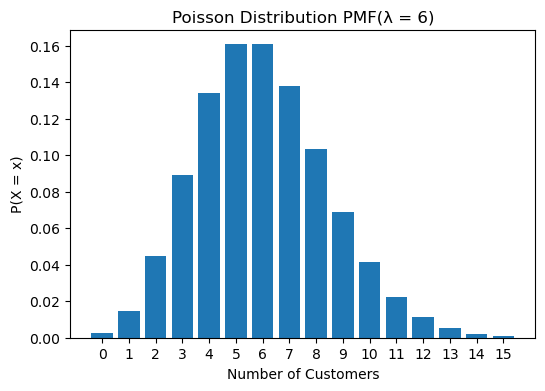

In [2]:
rate = 6
x = np.arange(0, 16)
pmf = poisson.pmf(x, rate)

plt.figure(figsize=(6, 4))
plt.bar(x, pmf)
plt.xlabel('Number of Customers')
plt.ylabel('P(X = x)')
plt.title('Poisson Distribution PMF(λ = 6)')
plt.xticks(x)
plt.show()


Define a new random variable 𝑌 and calculate a new average rate to represent
the number of customers arriving in 90-minute periods.

In [3]:
# New rate for a 90-minute period
new_rate = 6 * 1.5
new_rate

9.0

Calculate the probability that during any 90-minute period the number of
customers arriving at this café is i) exactly 5, i.e., 𝑃(𝑌 = 5) and ii) at least 10, i.e.,
𝑃(𝑌 ≥ 10).

In [4]:
# P(Y = 5)
prob_Y_equals_5 = (exp(-new_rate) * new_rate**5) / factorial(5)
# P(Y >= 10)
prob_Y_at_least_10 = 1 - sum((exp(-new_rate) * new_rate**k) / factorial(k) for k in range(10))
prob_Y_equals_5, prob_Y_at_least_10


(0.06072687934595285, 0.4125917556680585)

A customer arrives at 10.00am. Find the probability that the next customer
arrives before 10.15am.

In [5]:
rate_15_minutes = 1.5
prob_at_least_1_customer = 1 - poisson.cdf(0, rate_15_minutes)
prob_at_least_1_customer

0.7768698398515702

P2. Each of 500 soldiers in an army company independently has a certain disease with
probability 𝑝 = 1/103. This disease will show up in a blood test, and to facilitate matters,
blood samples from all 500 soldiers are pooled and tested.

This event can be modeled with binomial distribution.
𝑛 = 500, 𝑝 = 0.001
Since the number of experiments is too large, a Poisson distribution also gives
similar results.
𝜆 = 500 ⋅ 0.001 = 0.5

What is the expected number of soldiers 𝐸[𝑋] in this company to have the
disease?

In [6]:
n_soldiers = 500
p_disease = 0.001
expected = n_soldiers * p_disease
expected

0.5

What is the probability that the blood test will be positive (that is, at least one
person has the disease)?

In [7]:
# Calculate the cumulative distribution function for 0 successes
prob_zero = binom.cdf(0, 500, 0.001)

# Probability of at least one soldier having the disease
prob_one = 1 - prob_zero
prob_one

0.39362105513881496

Suppose that the blood test yields a positive result, i.e., it is given that X≥1. What
is the probability, under this circumstance, that more than one person (i.e., X≥2) has
the disease?

In [8]:
# Cumulative distribution function for 0 and 1 successes
prob_1 = 1-binom.cdf(1, n_soldiers, p_disease)
# at least one soldier having the disease
prob_2 =  1-binom.pmf(0, n_soldiers, p_disease)
prob = prob_1 / prob_2
prob

0.22897171928732796

P3. The diameter of a particular type of shaft (in inches) coming out of a manufacturing machine is normally distributed. The parameters of this distribution are as follows:

    Mean (𝜇): 0.9 inches
    Standard Deviation (𝜎): 0.003 inches

The customer has provided specification limits for the diameter of the shaft. These limits are:

    Diameter (𝑑): 0.9 ± 0.005 inches

What percentage of the production will fail to stay within the specified limits?

In [9]:
# Given values
mu = 0.9  
sigma = 0.003 
lower_limit = 0.895  
upper_limit = 0.905  

z_lower = (lower_limit - mu) / sigma
z_upper = (upper_limit - mu) / sigma

prob_below_lower = norm.cdf(z_lower)
prob_above_upper = 1 - norm.cdf(z_upper)

percentage_failure = (prob_below_lower + prob_above_upper) * 100
percentage_failure

9.558070454562914

Approximately 90% of the production will fall within the specified limits. 10% of the
production will be wasted.

What is the maximum allowable value of 𝜎 that will permit no more than 1 in 100 defectives when the diameters are normally distributed with 𝜇 = 0.9 and 𝜎?

In [10]:
max_defectives = 0.01  
sigma = 0.003

while True:
    prob_below_lower = norm.cdf(lower_limit, mu, sigma)
    prob_above_upper = 1 - norm.cdf(upper_limit, mu, sigma)
    percentage_defective = prob_below_lower + prob_above_upper
    if percentage_defective <= max_defectives:
        break
    sigma -= 0.00001

print(f"The maximum allowable value of sigma that will permit no more than 1 in 100 defectives is {sigma}")

The maximum allowable value of sigma that will permit no more than 1 in 100 defectives is 0.0019399999999999973


P4. Jane is planning to buy a particular type of motorcycle. She is considering buying either a
brand new or a used motorcycle. The total number of thousands of miles that a motorcycle
can be ridden without any failure is a random variable 𝑋.

Assume that 𝑋 is exponentially distributed with an average of 18,000 miles.
What is the probability that Jane can ride a brand-new motorcycle for 20,000 miles
without any failure?

In [11]:
mu = 18  
x = 20  
lmbda = 1 / mu

cdf_x = 1 - math.exp(-lmbda * x)
prob = 1 - cdf_x
prob

0.3291929878079056

assume that 𝑋 follows a Weibull distribution with 𝜆 = 1/18,000 miles and
𝑘 = 1.5. What is the probability that the brand-new motorcycle can be ridden for
20,000 miles without any failure?

In [12]:
lambda_ = 18  
k = 1.5 

cdf_x = weibull_min.cdf(x, k, scale=lambda_)
probw = 1 - cdf_x
probw


0.3099904004692884

Assuming a Weibull distribution, what is the probability that Jane can ride
the motorcycle from Joe for an additional 20,000 miles without any failure?

In [13]:
x1 = 30  
cdf_x = weibull_min.cdf(x1, k, scale=lambda_)

probw1 = 1 - cdf_x
probw1

0.11629125513840854